# Name: Margaret Nguyen

# Generate scatter plots

**Assignment: Generate scatter plots using the list of variables from the df_pa_crash and df_mass_bna.
List of variables from df_pa_crash:**
- BNA Score
- POPULATION  
- LAND_AREA 
- BIKE_TO_WORK_EST: The Bike to work estimate is the American Community Survey's 5-year estimate for the number of people who commute to work on a bicycle. It is queried from the 2021 dataset for each of the county subdivisions in Pennsylvania. 
- BICYCLE_BY_AUTO_COUNT: The number of cyclists' deaths and serious injuries 2017-2021.
- BICYCLE_DEATH_BY_AUTO_COUNT
    + BY_AUTO_COUNT should refer to cyclists deaths in crashes with automobiles. 
- BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT 
    + BY_AUTO_COUNT should refer to cyclists seriously injured in crashes with automobiles.

In [1]:
# Import packages 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## I. CLEAN DATASETS

In [2]:
# Import data
df_pa_crash = pd.read_csv('./data/df_pa_crash.csv')
df_mass_bna = pd.read_csv('./data/df_mass_bna.csv')

# Clean datasets
df_pa_crash = df_pa_crash.drop(columns = ['Unnamed: 0'])
df_mass_bna = df_mass_bna.drop(columns = ['Unnamed: 0'])

# Check for the shape of the dataframe
print(df_pa_crash.shape)
print(df_mass_bna.shape)

(44, 48)
(17230, 173)


/var/folders/vw/dbzntfg96b58pmmcc2cxykdh0000gn/T/ipykernel_9592/1122545515.py:3: DtypeWarning: Columns (26,34,35,68,97) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mass_bna = pd.read_csv('/Users/margaret06/Documents/GitHub/Carlisle_Borough_Transportation_Study/data/df_mass_bna.csv')


In [3]:
# Specify the needed columns
df_mass_crash = df_mass_bna[['CITY_TOWN_NAME', 'state', 'county', 'county_subdivision', 'COUNTY_NAME', 'BNA Score',\
                             'POPULATION', 'BIKE_TO_WORK_EST', 'VEHC_CONFIG_CL', 'FIRST_HRMF_EVENT_DESCR',\
                             'MOST_HRMFL_EVT_CL', 'NON_MTRST_TYPE_CL', 'INJY_STAT_DESCR']]

# Exclude the NaN from 'VEHC_CONFIG_CL'
df_mass_crash = df_mass_crash[df_mass_crash['VEHC_CONFIG_CL'].notna()]

# List of NOT automobiles: Snowmobile, Moped, Motorcycle, Other Light Trucks (10,000 lbs., or Less), Other e.g. Farm Equipment, Unknown.
# Exclude the non-automobiles from 'VEHC_CONFIG_CL' columns
list_non_automobiles = ['V1:(Unknown vehicle configuration)', 'V1:(Other e.g. farm equipment)', 'V1:(Unknown vehicle configuration) / V2:(Unknown vehicle configuration)']
df_mass_crash = df_mass_crash[~df_mass_crash['VEHC_CONFIG_CL'].isin(list_non_automobiles)]

**CALCULATE BICYCLE_BY_AUTO_COUNT, BICYCLE_DEATH_BY_AUTO_COUNT, AND BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT FOR 'df_mass_crash'**

In [4]:
# Fatal - injuries that resulted in death 
# Incapacitating - serious injuries require immediate medical attention

## BICYCLE_DEATH_BY_AUTO_COUNT
# Filter the DataFrame for cyclist fatalities
cyclist_fatalities = df_mass_crash[(df_mass_crash['INJY_STAT_DESCR'] == 'Fatal injury (K)') & (df_mass_crash['NON_MTRST_TYPE_CL'] == 'Cyclist')]

# Group the filtered DataFrame by 'CITY_TOWN_NAME' and calculate the count for each city
bicycle_death_counts = cyclist_fatalities.groupby('CITY_TOWN_NAME').size().reset_index(name='BICYCLE_DEATH_BY_AUTO_COUNT')

# Merge the bicycle_death_counts DataFrame into df_mass_crash on 'CITY_TOWN_NAME'
df_mass_crash = df_mass_crash.merge(bicycle_death_counts, on='CITY_TOWN_NAME', how='left')

## BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT
cyclist_incapacitating = df_mass_crash[(df_mass_crash['INJY_STAT_DESCR'] == 'Non-fatal injury - Incapacitating') & (df_mass_crash['NON_MTRST_TYPE_CL'] == 'Cyclist')]
bicycle_sus_serious_inj_counts = cyclist_incapacitating.groupby('CITY_TOWN_NAME').size().reset_index(name='BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT')

# Merge the bicycle_sus_serious_inj_counts DataFrame into df_mass_crash on 'CITY_TOWN_NAME'
df_mass_crash = df_mass_crash.merge(bicycle_sus_serious_inj_counts, on='CITY_TOWN_NAME', how='left')

# Replace NaN values with 0 in the specified columns
df_mass_crash['BICYCLE_DEATH_BY_AUTO_COUNT'].fillna(0, inplace=True)
df_mass_crash['BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT'].fillna(0, inplace=True)

## BICYCLE_BY_AUTO_COUNT
df_mass_crash['BICYCLE_BY_AUTO_COUNT'] = df_mass_crash['BICYCLE_DEATH_BY_AUTO_COUNT'] + df_mass_crash['BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT']

# Drop the duplicated rows
df_mass_crash = df_mass_crash.drop_duplicates(subset=['CITY_TOWN_NAME', 'BNA Score', 'POPULATION', 'BIKE_TO_WORK_EST',\
                                                     'BICYCLE_BY_AUTO_COUNT', 'BICYCLE_DEATH_BY_AUTO_COUNT', 'BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT'])

# Drop the specified columns from df_mass_crash in place
df_mass_crash.drop(['VEHC_CONFIG_CL', 'FIRST_HRMF_EVENT_DESCR', 'MOST_HRMFL_EVT_CL', 'NON_MTRST_TYPE_CL', 'INJY_STAT_DESCR'], axis=1, inplace=True)

# Convert from float to int 
df_mass_crash['BICYCLE_BY_AUTO_COUNT'] = df_mass_crash['BICYCLE_BY_AUTO_COUNT'].astype(int)
df_mass_crash['BICYCLE_DEATH_BY_AUTO_COUNT'] = df_mass_crash['BICYCLE_DEATH_BY_AUTO_COUNT'].astype(int)
df_mass_crash['BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT'] = df_mass_crash['BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT'].astype(int)

# Reset index
df_mass_crash.reset_index(drop = True, inplace = True)

# Show the dataframe
df_mass_crash

,CITY_TOWN_NAME,state,county,county_subdivision,COUNTY_NAME,BNA Score,POPULATION,BIKE_TO_WORK_EST,BICYCLE_DEATH_BY_AUTO_COUNT,BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT,BICYCLE_BY_AUTO_COUNT
0,BOSTON,25,25,7000,Suffolk County,28,672814,7294,5,23,28
1,BROOKLINE,25,21,9175,Norfolk County,19,62620,1725,0,2,2
2,REVERE,25,25,56585,Suffolk County,7,60720,231,0,0,0
3,BRAINTREE,25,21,7740,Norfolk County,11,38712,16,0,0,0
4,BARNSTABLE,25,1,3690,Barnstable County,9,48556,35,1,4,5
5,WALTHAM,25,17,72600,Middlesex County,7,64655,185,0,2,2
6,MALDEN,25,17,37875,Middlesex County,4,65602,141,0,0,0
7,NORWOOD,25,21,50250,Norfolk County,8,31256,111,0,0,0
8,FALL RIVER,25,5,23000,Bristol County,6,93339,41,0,3,3
9,SPRINGFIELD,25,13,67000,Hampden County,9,155770,65,1,8,9


## II. PLOT SCATTER PLOTS (SEPERATE PLOTS FOR DF_MASS_CRASH AND DF_PA_CRASH)

**Is there a correlation between crashes per capita and BNA scores?**

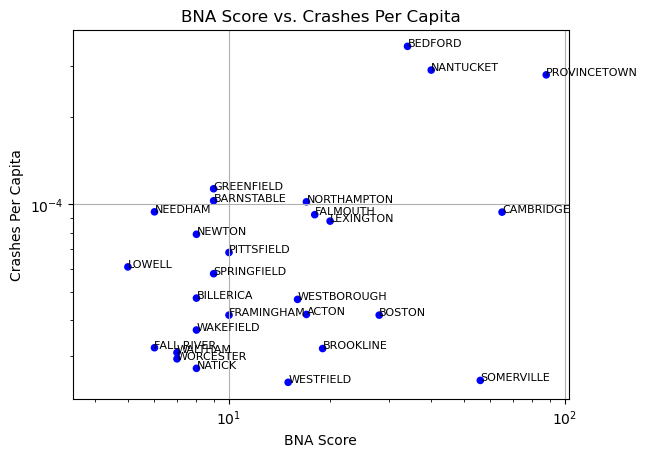

In [5]:
# Calculate crashes per capita and create a scatter plot
df_mass_crash['crashes_per_capita'] = df_mass_crash['BICYCLE_BY_AUTO_COUNT'] / df_mass_crash['POPULATION']

# Create scatter plot
df_mass_crash['color'] = 'b'
ax = df_mass_crash.plot.scatter(x='BNA Score', y='crashes_per_capita', c='color', title='BNA Score vs. Crashes Per Capita')
plt.xlabel('BNA Score')
plt.ylabel('Crashes Per Capita')
plt.grid(True)

plt.xscale('log')
plt.yscale('log')

# Annotate the dots with city names
for i, row in df_mass_crash.iterrows():
    ax.annotate(row['CITY_TOWN_NAME'], (row['BNA Score'], row['crashes_per_capita']), fontsize=8)

# Show the plot
plt.show()

In [6]:
# Remove BEDFORD, NANTUCKET, PROVINCETOWN, CAMBRIDGE, AND SOMERVILLE because they are outliers
list_outliers = ['BEDFORD', 'NANTUCKET', 'PROVINCETOWN', 'CAMBRIDGE', 'SOMERVILLE']
df_mass_crash_filtered = df_mass_crash[~df_mass_crash['CITY_TOWN_NAME'].isin(list_outliers)]

/var/folders/vw/dbzntfg96b58pmmcc2cxykdh0000gn/T/ipykernel_9592/4123667427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mass_crash_filtered['crashes_per_capita'] = df_mass_crash_filtered['BICYCLE_BY_AUTO_COUNT'] / df_mass_crash_filtered['POPULATION']
/var/folders/vw/dbzntfg96b58pmmcc2cxykdh0000gn/T/ipykernel_9592/4123667427.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mass_crash_filtered['color'] = 'b'


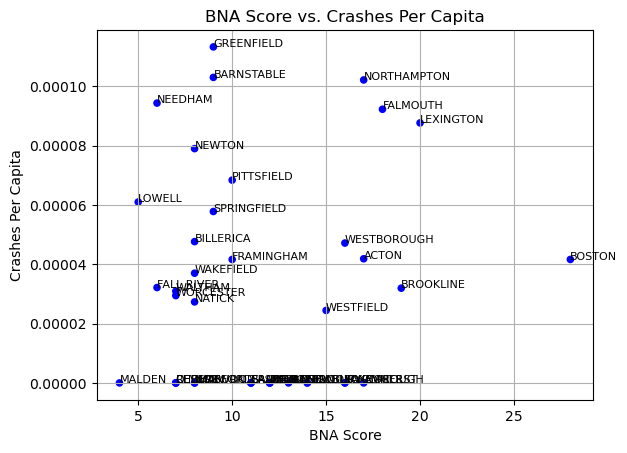

In [7]:
# Calculate crashes per capita and create a scatter plot
df_mass_crash_filtered['crashes_per_capita'] = df_mass_crash_filtered['BICYCLE_BY_AUTO_COUNT'] / df_mass_crash_filtered['POPULATION']

# Create scatter plot
df_mass_crash_filtered['color'] = 'b'
ax = df_mass_crash_filtered.plot.scatter(x='BNA Score', y='crashes_per_capita', c='color', title='BNA Score vs. Crashes Per Capita')
plt.xlabel('BNA Score')
plt.ylabel('Crashes Per Capita')
plt.grid(True)

# Annotate the dots with city names
for i, row in df_mass_crash_filtered.iterrows():
    ax.annotate(row['CITY_TOWN_NAME'], (row['BNA Score'], row['crashes_per_capita']), fontsize=8)

# Show the plot
plt.show()

In [8]:
# Create color variable to mark Carlisle
# Assign a different color to Carlisle 
df_pa_crash['color']='b'
df_pa_crash['color'][df_pa_crash['PENN_DOT_MUNI_ID']==21402]='red'
df_pa_crash[df_pa_crash['PENN_DOT_MUNI_ID']==21402].head()

/var/folders/vw/dbzntfg96b58pmmcc2cxykdh0000gn/T/ipykernel_9592/426312683.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pa_crash['color'][df_pa_crash['PENN_DOT_MUNI_ID']==21402]='red'


,NAME,PENN_DOT_MUNI_ID,state,county,county_subdivision,POPULATION,LAND_AREA,BIKE_TO_WORK_EST,BIKE_TO_WORK_MARG,WALK_TO_WORK_EST,...,BICYCLE_SUSP_SERIOUS_INJ_SOLO_COUNT,PED_DEATH_SOLO_COUNT,PED_SUSP_SERIOUS_INJ_SOLO_COUNT,City,BNA Score,BICYCLE_BY_AUTO_COUNT,PED_BY_AUTO_COUNT,BICYCLE_SOLO_COUNT,PED_SOLO_COUNT,color
8,"Carlisle borough, Cumberland County",21402,42,41,11272,19869,5.5,235,104,1052,...,2.0,1.0,3.0,carlisle,38,4.0,3.0,2.0,4.0,red


In [9]:
# Remove Philadelphia because it is an outlier
df_pa_crash = df_pa_crash[df_pa_crash['City']!='philadelphia']

# View the dataframe
df_pa_crash.head()

,NAME,PENN_DOT_MUNI_ID,state,county,county_subdivision,POPULATION,LAND_AREA,BIKE_TO_WORK_EST,BIKE_TO_WORK_MARG,WALK_TO_WORK_EST,...,BICYCLE_SUSP_SERIOUS_INJ_SOLO_COUNT,PED_DEATH_SOLO_COUNT,PED_SUSP_SERIOUS_INJ_SOLO_COUNT,City,BNA Score,BICYCLE_BY_AUTO_COUNT,PED_BY_AUTO_COUNT,BICYCLE_SOLO_COUNT,PED_SOLO_COUNT,color
0,"Allentown city, Lehigh County",39301,42,77,2000,125250,17.6,79,51,2396,...,0.0,1.0,20.0,allentown,29,4.0,31.0,0.0,21.0,b
1,"Altoona city, Blair County",7301,42,13,2184,44114,9.9,4,6,761,...,2.0,0.0,6.0,altoona,36,1.0,6.0,2.0,6.0,b
2,"Athens borough, Bradford County",8402,42,15,3392,3268,1.8,0,11,0,...,0.0,0.0,0.0,athens,23,0.0,0.0,0.0,0.0,b
3,"Beaver borough, Beaver County",4404,42,7,4688,4438,0.9,0,11,75,...,0.0,1.0,0.0,beaver,36,NaN,NaN,0.0,1.0,b
4,"Bellwood borough, Blair County",7401,42,13,5384,1600,0.4,0,11,25,...,NaN,NaN,NaN,bellwood,31,NaN,NaN,NaN,NaN,b


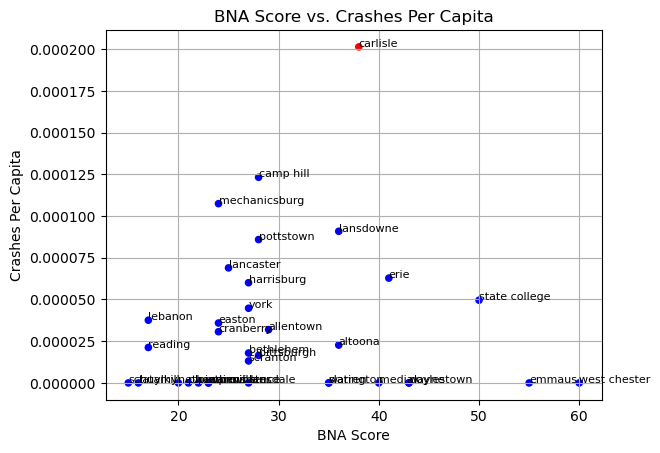

In [10]:
# Calculate crashes per capita and create a scatter plot
df_pa_crash['crashes_per_capita'] = df_pa_crash['BICYCLE_BY_AUTO_COUNT'] / df_pa_crash['POPULATION']

# Create scatter plot
ax = df_pa_crash.plot.scatter(x='BNA Score', y='crashes_per_capita',c='color', title='BNA Score vs. Crashes Per Capita')
plt.xlabel('BNA Score')
plt.ylabel('Crashes Per Capita')
plt.grid(True)

# Annotate the dots with city names
for i, row in df_pa_crash.iterrows():
    ax.annotate(row['City'], (row['BNA Score'], row['crashes_per_capita']), fontsize=8)

# Show the plot
plt.show()

**Is there a correlation between crashes per bike commuters (ACS 5-year estimates for bike to work) and BNA scores?**

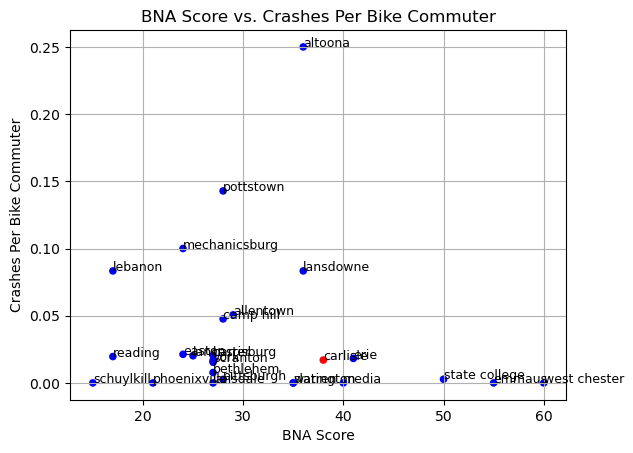

In [11]:
# Calculate crashes per bike commuter and create a scatter plot
df_pa_crash['crashes_per_bike_commuter'] = df_pa_crash['BICYCLE_BY_AUTO_COUNT'] / df_pa_crash['BIKE_TO_WORK_EST']

# Create scatter plot
ax = df_pa_crash.plot.scatter(x='BNA Score', y='crashes_per_bike_commuter',c='color', title='BNA Score vs. Crashes Per Bike Commuter')
plt.xlabel('BNA Score')
plt.ylabel('Crashes Per Bike Commuter')
plt.grid(True)

# Annotate the dots with city names
for i, row in df_pa_crash.iterrows():
    ax.annotate(row['City'], (row['BNA Score'], row['crashes_per_bike_commuter']), fontsize=9)

# Show the plot
plt.show()

In [12]:
# Show dataframe
df_pa_crash_sorted = df_pa_crash.sort_values(by='crashes_per_bike_commuter', ascending=False)
df_pa_crash_sorted.reset_index(inplace=True)
df_pa_crash_sorted[['NAME','crashes_per_bike_commuter']].tail()

,NAME,crashes_per_bike_commuter
38,"Tatamy borough, Northampton County",NaN
39,"Verona borough, Allegheny County",NaN
40,"Warminster township, Bucks County",NaN
41,"Wayne township, Schuylkill County",NaN
42,"West Grove borough, Chester County",NaN


**Is there a correlation between cyclists' deaths per capita and BNA scores?**

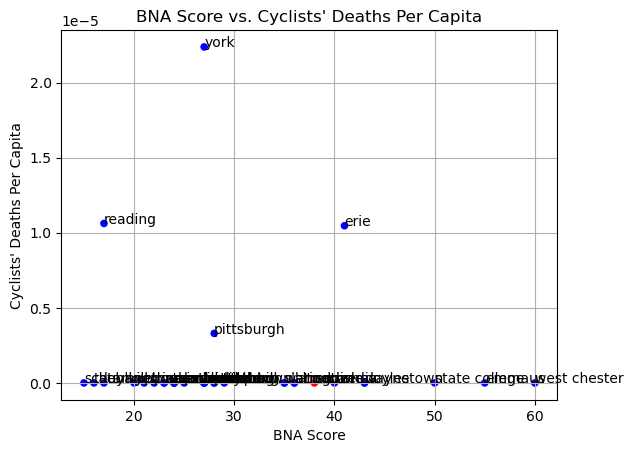

In [13]:
# Calculate cyclists' deaths per capita and create a scatter plot
df_pa_crash['deaths_per_capita'] = df_pa_crash['BICYCLE_DEATH_BY_AUTO_COUNT'] / df_pa_crash['POPULATION']

# Create scatter plot
ax = df_pa_crash.plot.scatter(x='BNA Score', y='deaths_per_capita', c='color', title="BNA Score vs. Cyclists' Deaths Per Capita")
plt.xlabel('BNA Score')
plt.ylabel("Cyclists' Deaths Per Capita")
plt.grid(True)

# Annotate the dots with city names
for i, row in df_pa_crash.iterrows():
    ax.annotate(row['City'], (row['BNA Score'], row['deaths_per_capita']))

# Show the plot
plt.show()

**Is there a correlation between cyclists' deaths per bike commuters (ACS 5-year estimates for bike to work) and BNA scores?**

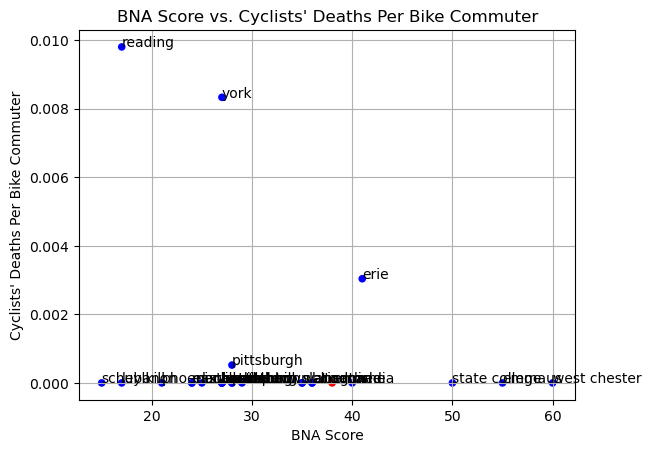

In [14]:
# Calculate cyclists' deaths per bike commuter and create a scatter plot
df_pa_crash['deaths_per_bike_commuter'] = df_pa_crash['BICYCLE_DEATH_BY_AUTO_COUNT'] / df_pa_crash['BIKE_TO_WORK_EST']

# Create scatter plot
ax = df_pa_crash.plot.scatter(x='BNA Score', y='deaths_per_bike_commuter', c='color', title="BNA Score vs. Cyclists' Deaths Per Bike Commuter")
plt.xlabel('BNA Score')
plt.ylabel("Cyclists' Deaths Per Bike Commuter")
plt.grid(True)

# Annotate the dots with city names
for i, row in df_pa_crash.iterrows():
    ax.annotate(row['City'], (row['BNA Score'], row['deaths_per_bike_commuter']))

# Show the plot
plt.show()

**Is there a correlation between cyclists' serious injuries per capita and BNA scores?**

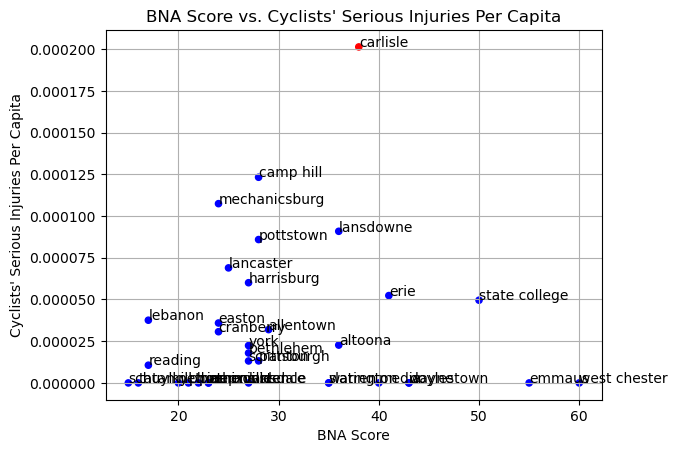

In [15]:
# Calculate cyclists' serious injuries per capita and create a scatter plot
df_pa_crash['injuries_per_capita'] = df_pa_crash['BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT'] / df_pa_crash['POPULATION']

# Create scatter plot
ax = df_pa_crash.plot.scatter(x='BNA Score', y='injuries_per_capita', c='color', title="BNA Score vs. Cyclists' Serious Injuries Per Capita")
plt.xlabel('BNA Score')
plt.ylabel("Cyclists' Serious Injuries Per Capita")
plt.grid(True)

# Annotate the dots with city names
for i, row in df_pa_crash.iterrows():
    ax.annotate(row['City'], (row['BNA Score'], row['injuries_per_capita']))

# Show the plot
plt.show()

**Is there a correlation between cyclists' serious injuries per bike commuter and BNA scores?**

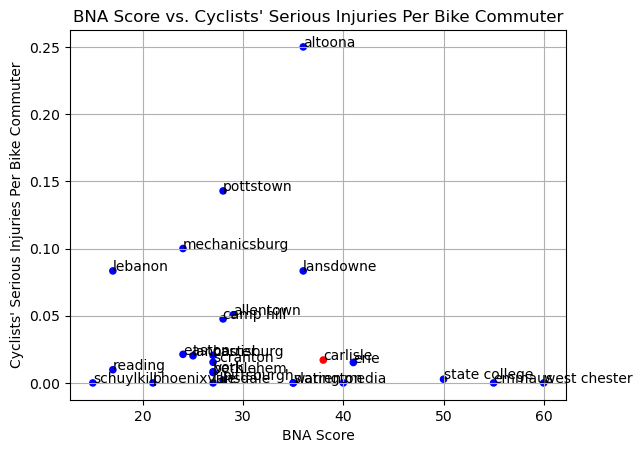

In [16]:
# Calculate cyclists' serious injuries per bike commuter and create a scatter plot
df_pa_crash['injuries_per_bike_commuter'] = df_pa_crash['BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT'] / df_pa_crash['BIKE_TO_WORK_EST']

# Create scatter plot
ax = df_pa_crash.plot.scatter(x='BNA Score', y='injuries_per_bike_commuter', c='color', title="BNA Score vs. Cyclists' Serious Injuries Per Bike Commuter")
plt.xlabel('BNA Score')
plt.ylabel("Cyclists' Serious Injuries Per Bike Commuter")
plt.grid(True)

# Annotate the dots with city names
for i, row in df_pa_crash.iterrows():
    ax.annotate(row['City'], (row['BNA Score'], row['injuries_per_bike_commuter']))

# Show the plot
plt.show()

## III. REPLOT SCATTER PLOTS (COMBINE DF_PA_CRASH AND DF_MASS_CRASH)

In [17]:
# Create color variable to mark Carlisle
# Assign a different color to Carlisle 
df_pa_crash['color']='b'
df_pa_crash['color'][df_pa_crash['PENN_DOT_MUNI_ID']==21402]='red'
df_pa_crash[df_pa_crash['PENN_DOT_MUNI_ID']==21402].head()

/var/folders/vw/dbzntfg96b58pmmcc2cxykdh0000gn/T/ipykernel_9592/426312683.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pa_crash['color'][df_pa_crash['PENN_DOT_MUNI_ID']==21402]='red'


,NAME,PENN_DOT_MUNI_ID,state,county,county_subdivision,POPULATION,LAND_AREA,BIKE_TO_WORK_EST,BIKE_TO_WORK_MARG,WALK_TO_WORK_EST,...,PED_BY_AUTO_COUNT,BICYCLE_SOLO_COUNT,PED_SOLO_COUNT,color,crashes_per_capita,crashes_per_bike_commuter,deaths_per_capita,deaths_per_bike_commuter,injuries_per_capita,injuries_per_bike_commuter
8,"Carlisle borough, Cumberland County",21402,42,41,11272,19869,5.5,235,104,1052,...,3.0,2.0,4.0,red,0.000201,0.017021,0.0,0.0,0.000201,0.017021


**Is there a correlation between crashes per capita and BNA scores?**

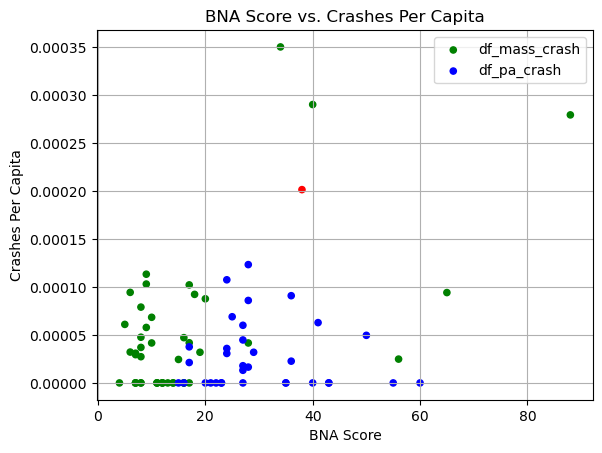

In [18]:
# Create a scatter plot for df_mass_crash
df_mass_crash['color'] = 'g'
ax = df_mass_crash.plot.scatter(x='BNA Score', y='crashes_per_capita', c='color', label='df_mass_crash')

# Create a scatter plot for df_pa_crash
df_pa_crash.plot.scatter(x='BNA Score', y='crashes_per_capita', c='color', label='df_pa_crash', ax=ax)

# Set labels and title
plt.xlabel('BNA Score')
plt.ylabel('Crashes Per Capita')
plt.title('BNA Score vs. Crashes Per Capita')

# Show the combined plot
plt.legend()
plt.grid(True)
plt.show()

**Is there a correlation between crashes per bike commuters (ACS 5-year estimates for bike to work) and BNA scores?**

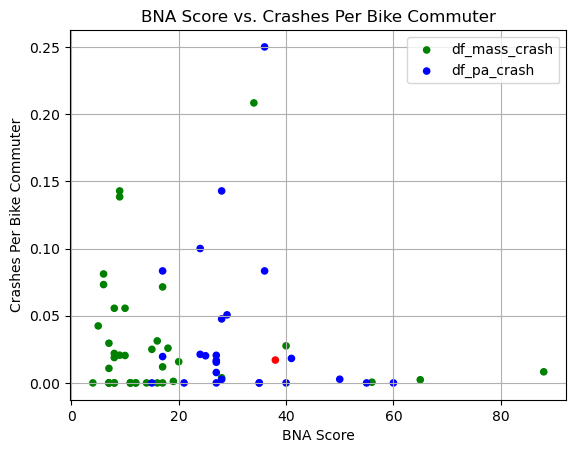

In [19]:
# Calculate crashes per bike commuter and create a scatter plot
df_mass_crash['crashes_per_bike_commuter'] = df_mass_crash['BICYCLE_BY_AUTO_COUNT'] / df_mass_crash['BIKE_TO_WORK_EST']

# Create a scatter plot for df_mass_crash
df_mass_crash['color'] = 'g'
ax = df_mass_crash.plot.scatter(x='BNA Score', y='crashes_per_bike_commuter', c='color', label='df_mass_crash')

# Create a scatter plot for df_pa_crash
df_pa_crash.plot.scatter(x='BNA Score', y='crashes_per_bike_commuter', c='color', label='df_pa_crash', ax=ax)

# Set labels and title
plt.xlabel('BNA Score')
plt.ylabel("Crashes Per Bike Commuter")
plt.title('BNA Score vs. Crashes Per Bike Commuter')

# Show the combined plot
plt.legend()
plt.grid(True)
plt.show()

**Is there a correlation between cyclists' deaths per capita and BNA scores?**

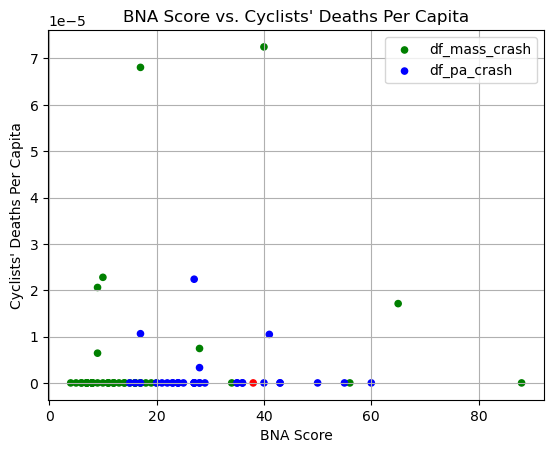

In [20]:
# Calculate cyclists' deaths per bike commuter and create a scatter plot
df_mass_crash['deaths_per_capita'] = df_mass_crash['BICYCLE_DEATH_BY_AUTO_COUNT'] / df_mass_crash['POPULATION']

# Create a scatter plot for df_mass_crash
df_mass_crash['color'] = 'g'
ax = df_mass_crash.plot.scatter(x='BNA Score', y='deaths_per_capita', c='color', label='df_mass_crash')

# Create a scatter plot for df_pa_crash
df_pa_crash.plot.scatter(x='BNA Score', y='deaths_per_capita', c='color', label='df_pa_crash', ax=ax)

# Set labels and title
plt.xlabel('BNA Score')
plt.ylabel("Cyclists' Deaths Per Capita")
plt.title("BNA Score vs. Cyclists' Deaths Per Capita")

# Show the combined plot
plt.legend()
plt.grid(True)
plt.show()

**Is there a correlation between cyclists' deaths per bike commuters (ACS 5-year estimates for bike to work) and BNA scores?**

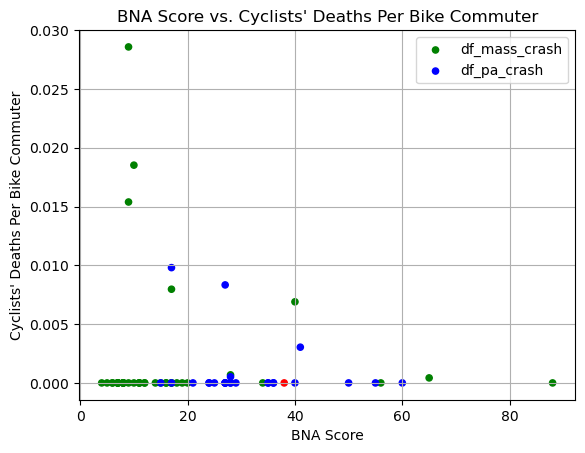

In [21]:
# Calculate cyclists' deaths per bike commuter and create a scatter plot
df_mass_crash['deaths_per_bike_commuter'] = df_mass_crash['BICYCLE_DEATH_BY_AUTO_COUNT'] / df_mass_crash['BIKE_TO_WORK_EST']

# Create a scatter plot for df_mass_crash
df_mass_crash['color'] = 'g'
ax = df_mass_crash.plot.scatter(x='BNA Score', y='deaths_per_bike_commuter', c='color', label='df_mass_crash')

# Create a scatter plot for df_pa_crash
df_pa_crash.plot.scatter(x='BNA Score', y='deaths_per_bike_commuter', c='color', label='df_pa_crash', ax=ax)

# Set labels and title
plt.xlabel('BNA Score')
plt.ylabel("Cyclists' Deaths Per Bike Commuter")
plt.title("BNA Score vs. Cyclists' Deaths Per Bike Commuter")

# Show the combined plot
plt.legend()
plt.grid(True)
plt.show()

**Is there a correlation between cyclists' serious injuries per capita and BNA scores?**

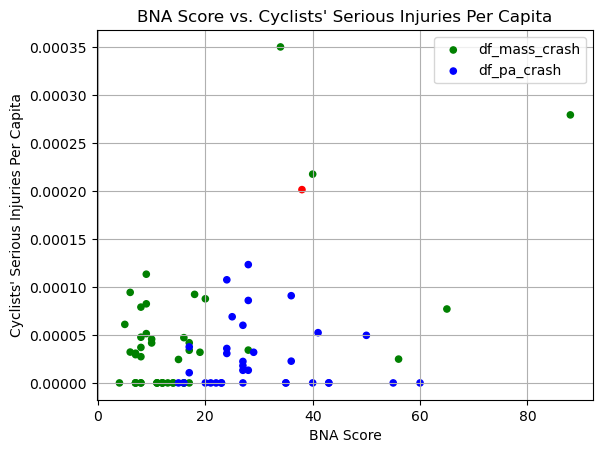

In [22]:
# Calculate cyclists' serious injuries per capita and create a scatter plot
df_mass_crash['injuries_per_capita'] = df_mass_crash['BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT'] / df_mass_crash['POPULATION']

# Create a scatter plot for df_mass_crash
df_mass_crash['color'] = 'g'
ax = df_mass_crash.plot.scatter(x='BNA Score', y='injuries_per_capita', c='color', label='df_mass_crash')

# Create a scatter plot for df_pa_crash
df_pa_crash.plot.scatter(x='BNA Score', y='injuries_per_capita', c='color', label='df_pa_crash', ax=ax)

# Set labels and title
plt.xlabel('BNA Score')
plt.ylabel("Cyclists' Serious Injuries Per Capita")
plt.title("BNA Score vs. Cyclists' Serious Injuries Per Capita")

# Show the combined plot
plt.legend()
plt.grid(True)
plt.show()

**Is there a correlation between cyclists' serious injuries per bike commuter and BNA scores?**

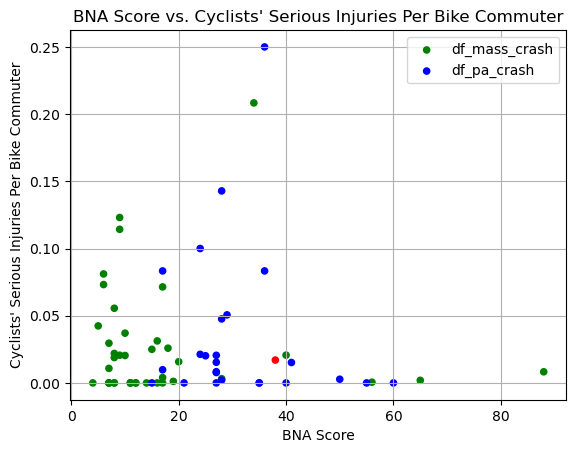

In [23]:
# Calculate cyclists' serious injuries per bike commuter and create a scatter plot
df_mass_crash['injuries_per_bike_commuter'] = df_mass_crash['BICYCLE_SUSP_SERIOUS_INJ_BY_AUTO_COUNT'] / df_mass_crash['BIKE_TO_WORK_EST']

# Create a scatter plot for df_mass_crash
df_mass_crash['color'] = 'g'
ax = df_mass_crash.plot.scatter(x='BNA Score', y='injuries_per_bike_commuter', c='color', label='df_mass_crash')

# Create a scatter plot for df_pa_crash
df_pa_crash.plot.scatter(x='BNA Score', y='injuries_per_bike_commuter', c='color', label='df_pa_crash', ax=ax)

# Set labels and title
plt.xlabel('BNA Score')
plt.ylabel("Cyclists' Serious Injuries Per Bike Commuter")
plt.title("BNA Score vs. Cyclists' Serious Injuries Per Bike Commuter")

# Show the combined plot
plt.legend()
plt.grid(True)
plt.show()